# EDA for HealthApp

In [111]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [112]:
df = pd.read_csv('C:/Users/LENOVO/Downloads/loghub-master/loghub-master/HealthApp/HealthApp_2k.log_structured.csv')
df

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data
...,...,...,...,...,...,...,...
1995,1996,20171224-0:58:53:985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1996,1997,20171224-0:59:7:581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1997,1998,20171224-1:0:0:794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1998,1999,20171224-1:1:0:935,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...


# Data pre-processing

In [113]:
df.drop(['EventTemplate'], axis=1, inplace=True)

In [114]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')
df = df.sort_values(by='Time')

In [115]:
df

,LineId,Time,Component,Pid,Content,EventId
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12
...,...,...,...,...,...,...
1995,1996,2017-12-24 00:58:53.985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44
1996,1997,2017-12-24 00:59:07.581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44
1997,1998,2017-12-24 01:00:00.794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44
1998,1999,2017-12-24 01:01:00.935,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44


In [116]:
df.isnull().sum()

LineId       0
Time         0
Component    0
Pid          0
Content      0
EventId      0
dtype: int64

In [117]:
df['Component'].unique()

array(['Step_LSC', 'Step_StandReportReceiver', 'Step_StandStepCounter',
       'Step_SPUtils', 'Step_ExtSDM', 'Step_ScreenUtil',
       'Step_FlushableStepDataCache', 'HiH_HiAppUtil',
       'HiH_HiHealthBinder', 'HiH_HiHealthDataInsertStore',
       'HiH_DataStatManager', 'HiH_ListenerManager', 'HiH_HiSyncControl',
       'HiH_HiSyncUtil', 'HiH_', 'HiH_HiBroadcastUtil',
       'Step_StandStepDataManager', 'Step_DataCache', 'Step_HGNH',
       'Step_NotificationUtil'], dtype=object)

# Step Counts Analysis

In [118]:
step_count = df[df['EventId'] == 'E42']
step_count

,LineId,Time,Component,Pid,Content,EventId
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42
7,8,2017-12-23 22:15:29.636,Step_LSC,30002312,onStandStepChanged 3579,E42
12,13,2017-12-23 22:15:29.738,Step_LSC,30002312,onStandStepChanged 3579,E42
13,14,2017-12-23 22:15:29.792,Step_LSC,30002312,onStandStepChanged 3580,E42
20,21,2017-12-23 22:15:30.331,Step_LSC,30002312,onStandStepChanged 3581,E42
...,...,...,...,...,...,...
1923,1924,2017-12-24 00:11:57.141,Step_LSC,30002312,onStandStepChanged 3786,E42
1933,1934,2017-12-24 00:15:52.983,Step_LSC,30002312,onStandStepChanged 3786,E42
1949,1950,2017-12-24 00:25:16.137,Step_LSC,30002312,onStandStepChanged 3786,E42
1955,1956,2017-12-24 00:25:17.137,Step_LSC,30002312,onStandStepChanged 3786,E42


In [119]:
daily_step_counts = step_count.groupby(step_count['Time'].dt.date).size()
daily_step_counts 

Time
2017-12-23    236
2017-12-24     24
dtype: int64

In [120]:
steps = df[df['EventId'].isin(['E42'])]
steps['StepCount'] = steps['Content'].str.extract(r'onStandStepChanged (\d+)')[0].astype(int)
steps

C:\Windows\Temp\ipykernel_16612\698825950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steps['StepCount'] = steps['Content'].str.extract(r'onStandStepChanged (\d+)')[0].astype(int)


,LineId,Time,Component,Pid,Content,EventId,StepCount
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,3579
7,8,2017-12-23 22:15:29.636,Step_LSC,30002312,onStandStepChanged 3579,E42,3579
12,13,2017-12-23 22:15:29.738,Step_LSC,30002312,onStandStepChanged 3579,E42,3579
13,14,2017-12-23 22:15:29.792,Step_LSC,30002312,onStandStepChanged 3580,E42,3580
20,21,2017-12-23 22:15:30.331,Step_LSC,30002312,onStandStepChanged 3581,E42,3581
...,...,...,...,...,...,...,...
1923,1924,2017-12-24 00:11:57.141,Step_LSC,30002312,onStandStepChanged 3786,E42,3786
1933,1934,2017-12-24 00:15:52.983,Step_LSC,30002312,onStandStepChanged 3786,E42,3786
1949,1950,2017-12-24 00:25:16.137,Step_LSC,30002312,onStandStepChanged 3786,E42,3786
1955,1956,2017-12-24 00:25:17.137,Step_LSC,30002312,onStandStepChanged 3786,E42,3786


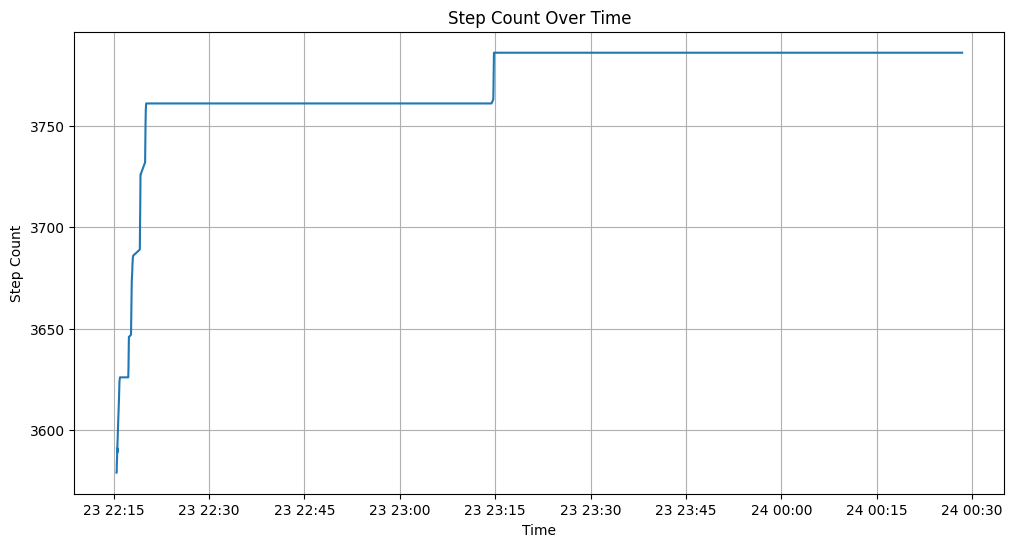

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(steps['Time'], steps['StepCount'])
plt.title('Step Count Over Time')
plt.xlabel('Time')
plt.ylabel('Step Count')
plt.grid(True)

plt.show()


In [122]:
day_wise_activity = steps.groupby(step_count['Time'].dt.date).size()
day_wise_activity = day_wise_activity.sort_values(ascending=False)

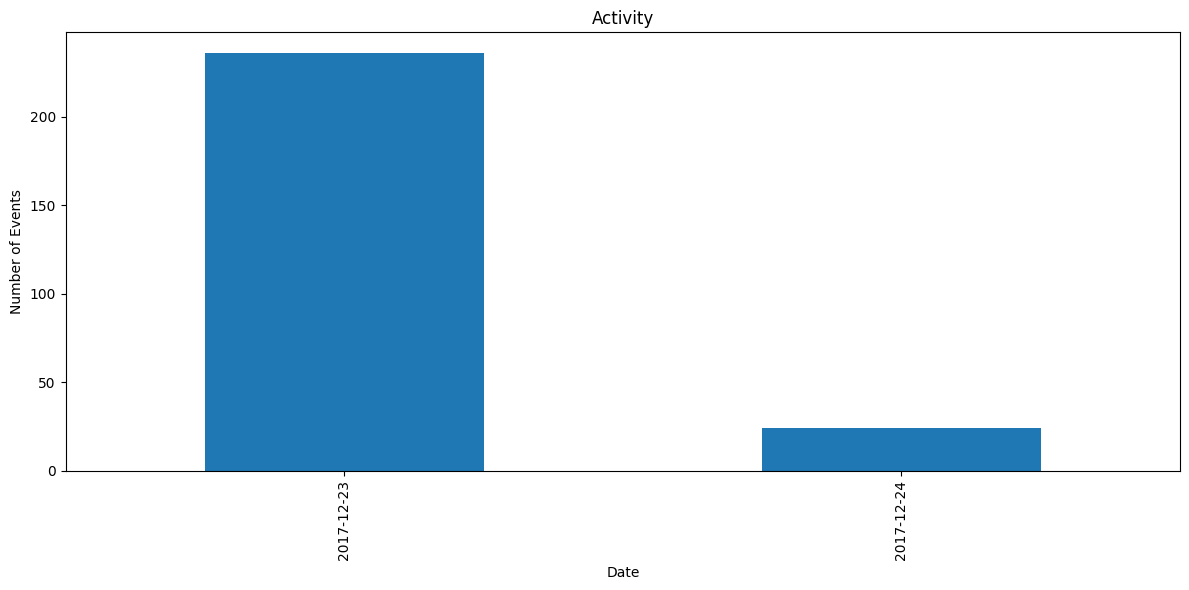

In [123]:
plt.figure(figsize=(12, 6))
day_wise_activity.plot(kind='bar')
plt.title('Activity')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

# Event Analysis

In [124]:
event_counts = df['EventId'].value_counts()

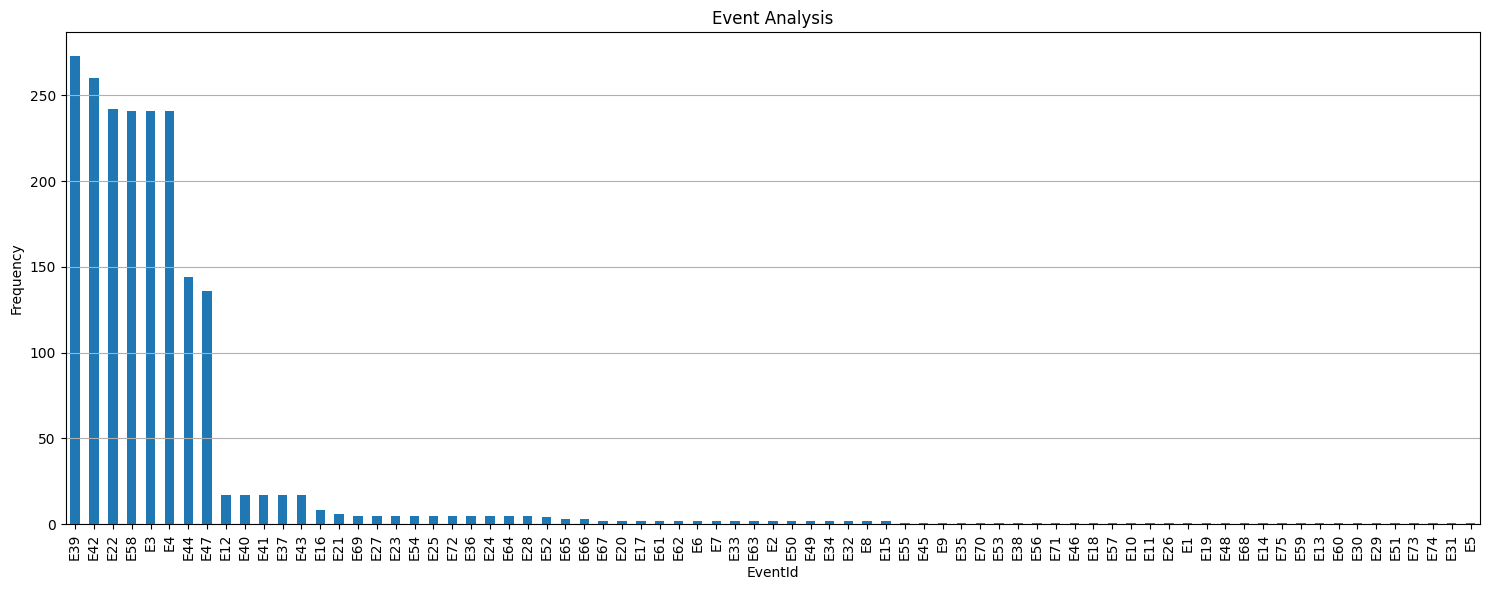

In [125]:
plt.figure(figsize=(15, 6))
event_counts.plot(kind='bar')
plt.title('Event Analysis')
plt.xlabel('EventId')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calories Analysis

In [126]:
Calories = df[df['EventId'] == 'E4'][['Time','Content', 'EventId']]
Calories['totalCalories'] = Calories['Content'].str.extract(r'totalCalories=(\d+)')[0].astype(float)
Calories

,Time,Content,EventId,totalCalories
8,2017-12-23 22:15:29.645,calculateCaloriesWithCache totalCalories=126775,E4,126775.0
17,2017-12-23 22:15:29.959,calculateCaloriesWithCache totalCalories=126797,E4,126797.0
24,2017-12-23 22:15:30.639,calculateCaloriesWithCache totalCalories=126818,E4,126818.0
31,2017-12-23 22:15:31.157,calculateCaloriesWithCache totalCalories=126861,E4,126861.0
38,2017-12-23 22:15:32.156,calculateCaloriesWithCache totalCalories=126882,E4,126882.0
...,...,...,...,...
1927,2017-12-24 00:11:57.449,calculateCaloriesWithCache totalCalories=0,E4,0.0
1937,2017-12-24 00:15:53.292,calculateCaloriesWithCache totalCalories=0,E4,0.0
1953,2017-12-24 00:25:16.445,calculateCaloriesWithCache totalCalories=0,E4,0.0
1959,2017-12-24 00:25:17.445,calculateCaloriesWithCache totalCalories=0,E4,0.0


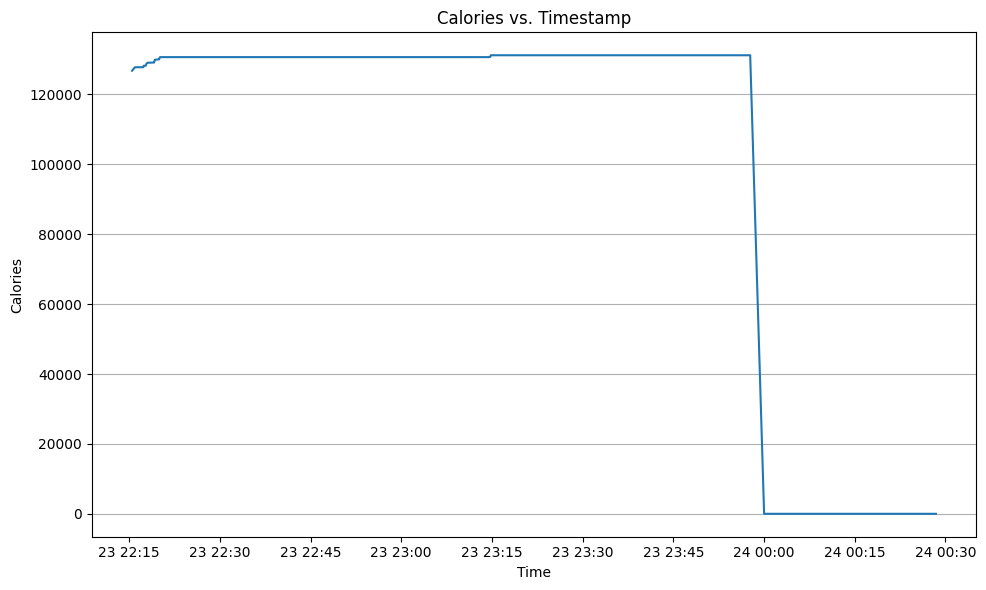

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(Calories['Time'], Calories['totalCalories'])
plt.xlabel('Time')
plt.ylabel('Calories')
plt.title('Calories vs. Timestamp')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

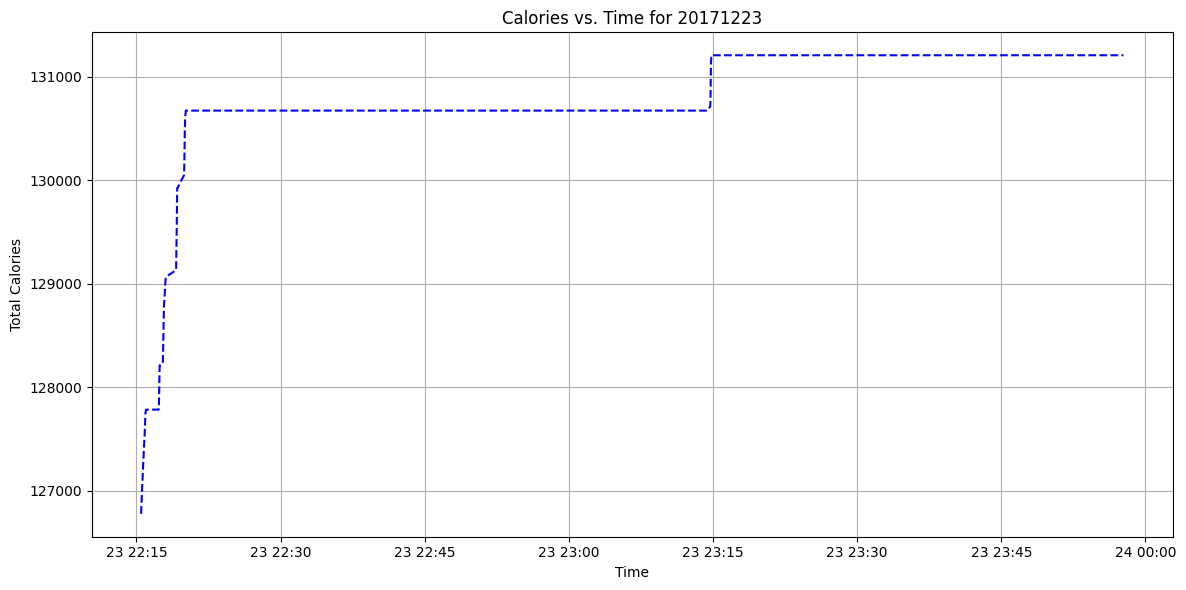

In [128]:
date_filter = '20171223'
filtered_df = CaloriesWithCache_df[CaloriesWithCache_df['Time'].dt.strftime('%Y%m%d') == date_filter]
plt.figure(figsize=(12, 6)) 
plt.plot(filtered_df['Time'], filtered_df['totalCalories'], linestyle='--', color='b')
plt.xlabel('Time')
plt.ylabel('Total Calories')
plt.title(f'Calories vs. Time for {date_filter}')
plt.grid(True)
plt.tight_layout()
plt.show()

# Altitude Analysis

In [129]:
Altitude = df[df['EventId'] == 'E3'][['Time', 'EventId','Content']]
Altitude['totalAltitude'] = Altitude['Content'].str.extract(r'totalAltitude=(\d+)')[0].astype(float)
Altitude

,Time,EventId,Content,totalAltitude
9,2017-12-23 22:15:29.648,E3,calculateAltitudeWithCache totalAltitude=240,240.0
18,2017-12-23 22:15:29.962,E3,calculateAltitudeWithCache totalAltitude=240,240.0
25,2017-12-23 22:15:30.641,E3,calculateAltitudeWithCache totalAltitude=240,240.0
32,2017-12-23 22:15:31.160,E3,calculateAltitudeWithCache totalAltitude=240,240.0
39,2017-12-23 22:15:32.162,E3,calculateAltitudeWithCache totalAltitude=240,240.0
...,...,...,...,...
1928,2017-12-24 00:11:57.450,E3,calculateAltitudeWithCache totalAltitude=0,0.0
1938,2017-12-24 00:15:53.292,E3,calculateAltitudeWithCache totalAltitude=0,0.0
1954,2017-12-24 00:25:16.445,E3,calculateAltitudeWithCache totalAltitude=0,0.0
1960,2017-12-24 00:25:17.445,E3,calculateAltitudeWithCache totalAltitude=0,0.0


In [130]:
Altitude['totalAltitude'].unique()

array([240.,   0.])

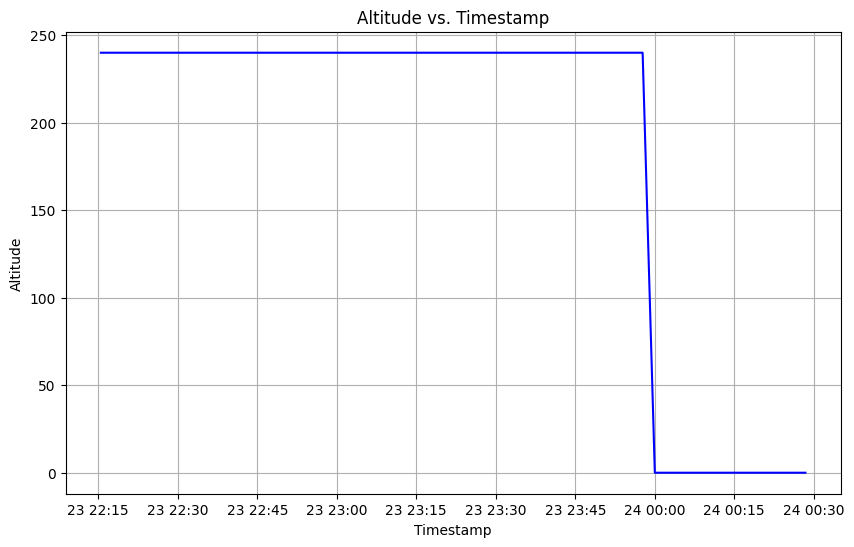

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(Altitude['Time'], Altitude['totalAltitude'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Altitude')
plt.title('Altitude vs. Timestamp')
plt.grid(True)
plt.show()

# Screen Time Analysis

In [132]:
event_ids_to_extract = ['E40', 'E41', 'E43']
def extract_screen_status(content):
    matches = re.findall(r'(SCREEN_(OFF|ON))', content)
    return ','.join([match[0] for match in matches])
dfSCREEN=df
dfSCREEN['Screen_Status'] = df[df['EventId'].isin(event_ids_to_extract)]['Content'].apply(extract_screen_status)
dfSCREEN

,LineId,Time,Component,Pid,Content,EventId,Screen_Status
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,NaN
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,NaN
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,SCREEN_ON
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,SCREEN_ON
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,NaN
...,...,...,...,...,...,...,...
1995,1996,2017-12-24 00:58:53.985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,NaN
1996,1997,2017-12-24 00:59:07.581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,NaN
1997,1998,2017-12-24 01:00:00.794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,NaN
1998,1999,2017-12-24 01:01:00.935,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,NaN


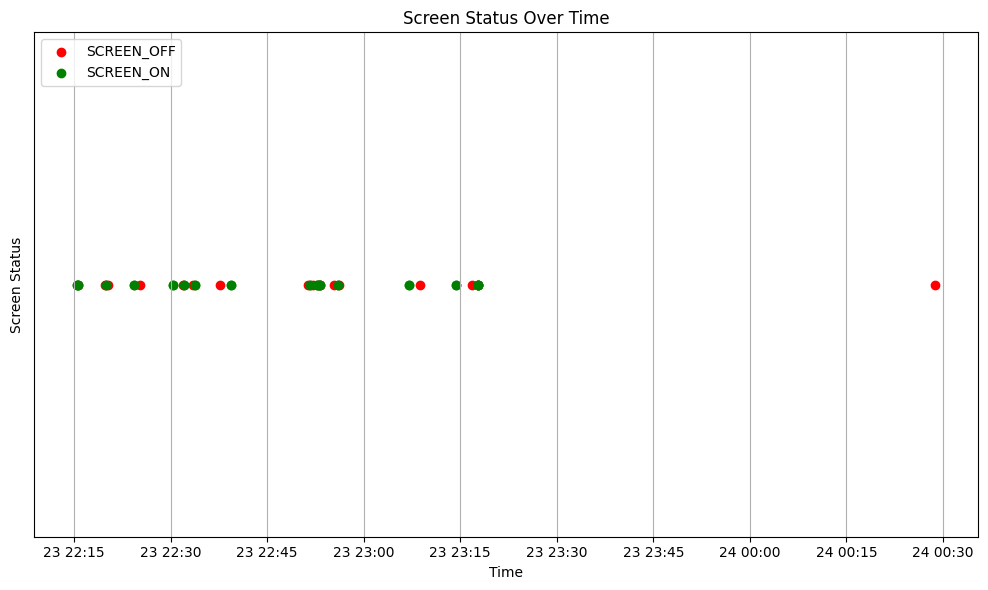

In [133]:
color_map = {
    'SCREEN_ON': 'green',
    'SCREEN_OFF': 'red'
}

plt.figure(figsize=(10, 6))
for status, group in dfSCREEN.groupby('Screen_Status'):
    plt.scatter(group['Time'], [1] * len(group), label=status, color=color_map.get(status, 'blue'))

plt.xlabel('Time')
plt.ylabel('Screen Status')
plt.title('Screen Status Over Time')

plt.legend(loc='upper left')

plt.yticks([])
plt.grid(True)
plt.tight_layout()
plt.show()


# Frequency of events occurance 

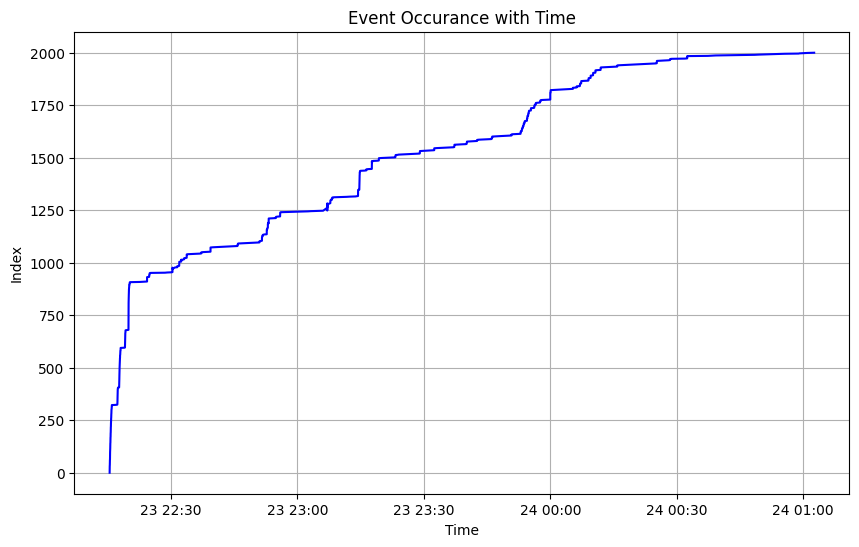

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df.index, color='b')
plt.title('Event Occurance with Time')
plt.xlabel('Time')
plt.ylabel('Index')
plt.grid(True)
plt.show()

# System Failure Events

In [135]:
System_Failure = df[df['EventId'] == 'E54']
System_Failure

,LineId,Time,Component,Pid,Content,EventId,Screen_Status
754,755,2017-12-23 22:19:58.428,HiH_HiBroadcastUtil,30002312,sendSyncFailedBroadcast,E54,NaN
794,795,2017-12-23 22:19:58.518,HiH_HiBroadcastUtil,30002312,sendSyncFailedBroadcast,E54,NaN
1014,1015,2017-12-23 22:32:28.801,HiH_HiBroadcastUtil,30002312,sendSyncFailedBroadcast,E54,NaN
1544,1545,2017-12-23 23:32:28.796,HiH_HiBroadcastUtil,30002312,sendSyncFailedBroadcast,E54,NaN
1982,1983,2017-12-24 00:32:28.806,HiH_HiBroadcastUtil,30002312,sendSyncFailedBroadcast,E54,NaN
